In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import zipfile
import os


In [9]:
from tensorflow.keras.models import load_model

model = load_model("final_model.h5")
print("Model Loaded Successfully!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model Loaded Successfully!


In [3]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,706,444 (6.51 MB)

 Trainable params: 1,704,458 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

In [6]:
!pip install kagglehub

import kagglehub

# Download latest version of EuroSAT dataset
path = kagglehub.dataset_download("apollo2506/eurosat-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'eurosat-dataset' dataset.
Path to dataset files: /kaggle/input/eurosat-dataset


In [7]:
import zipfile
import os

zip_path = "/content/Egypt_Data_Split (2).zip"   # ← عدل الاسم لو مختلف
extract_path = "/content/Egypt_Data_Split"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)
print(os.listdir(extract_path))


Extracted to: /content/Egypt_Data_Split
['Egypt_Data_Split']


In [8]:
import os
import shutil

euro_path = "/kaggle/input/eurosat-dataset/EuroSAT"  # ✔ الصحيح
egypt_path = "/content/Egypt_Data_Split/Egypt_Data_Split"  # جواهو train/test
merged_path = "/content/ALL_DATA_13"

os.makedirs(merged_path, exist_ok=True)

# --- Copy EuroSAT 10 classes ---
for cls in os.listdir(euro_path):
    src = os.path.join(euro_path, cls)
    dst = os.path.join(merged_path, cls)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)

# --- Copy Egypt Data ---
egypt_train = os.path.join(egypt_path, "train")
egypt_test  = os.path.join(egypt_path, "test")

for cls in ["Crops", "Desert", "Urban"]:
    cls_path = os.path.join(merged_path, cls)
    os.makedirs(cls_path, exist_ok=True)

    # Copy train
    for img in os.listdir(os.path.join(egypt_train, cls)):
        shutil.copy(
            os.path.join(egypt_train, cls, img),
            os.path.join(cls_path, img)
        )

    # Copy test
    for img in os.listdir(os.path.join(egypt_test, cls)):
        shutil.copy(
            os.path.join(egypt_test, cls, img),
            os.path.join(cls_path, f"test_{img}")
        )

print("✔️ Done merging!")
print("Final classes:", os.listdir(merged_path))


✔️ Done merging!
Final classes: ['Forest', 'Desert', 'Highway', 'Urban', 'Residential', 'Industrial', 'Pasture', 'AnnualCrop', 'PermanentCrop', 'SeaLake', 'HerbaceousVegetation', 'River', 'Crops']


In [10]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
DATA_PATH = "/content/ALL_DATA_13"

print("Classes found:", os.listdir(DATA_PATH))
print("Number of classes:", len(os.listdir(DATA_PATH)))


Classes found: ['Forest', 'Desert', 'Highway', 'Urban', 'Residential', 'Industrial', 'Pasture', 'AnnualCrop', 'PermanentCrop', 'SeaLake', 'HerbaceousVegetation', 'River', 'Crops']
Number of classes: 13


In [12]:
for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    if os.path.isdir(cls_path):
        print(cls, ":", len(os.listdir(cls_path)), "images")


Forest : 3000 images
Desert : 4392 images
Highway : 2500 images
Urban : 490 images
Residential : 3000 images
Industrial : 2500 images
Pasture : 2000 images
AnnualCrop : 3000 images
PermanentCrop : 2500 images
SeaLake : 3000 images
HerbaceousVegetation : 3000 images
River : 2500 images
Crops : 471 images


In [13]:
import PIL
from PIL import Image

def is_corrupted(path):
    try:
        img = Image.open(path)
        img.verify()
        return False
    except:
        return True

removed = 0

for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    for img in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img)
        if is_corrupted(img_path):
            os.remove(img_path)
            removed += 1

print("❌ Corrupted images removed:", removed)


❌ Corrupted images removed: 0


In [14]:
for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    for img in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img)

        try:
            im = Image.open(img_path)
            if im.mode != "RGB":
                im = im.convert("RGB")
                im.save(img_path)
        except:
            print("Error:", img_path)


In [15]:
for cls in os.listdir(DATA_PATH):
    cls_path = os.path.join(DATA_PATH, cls)
    for img in os.listdir(cls_path):
        if img.lower().endswith(".tif"):
            img_path = os.path.join(cls_path, img)
            im = Image.open(img_path)
            rgb = im.convert("RGB")
            new_path = img_path.replace(".tif", ".jpg")
            rgb.save(new_path)
            os.remove(img_path)


In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

SOURCE = "/content/ALL_DATA_13"      # مسار الداتا الكاملة (13 كلاس)
DEST = "/content/SPLIT_DATA"         # مسار الداتا بعد التقسيم

TRAIN_PATH = os.path.join(DEST, "train")
TEST_PATH  = os.path.join(DEST, "test")

os.makedirs(TRAIN_PATH, exist_ok=True)
os.makedirs(TEST_PATH, exist_ok=True)

# نبدأ في تقسيم كل كلاس
for cls in os.listdir(SOURCE):
    cls_path = os.path.join(SOURCE, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)

    # تقسيم Train/Test (80% / 20%)
    train_imgs, test_imgs = train_test_split(
        images, test_size=0.2, random_state=42
    )

    # إنشاء الفولدرات
    os.makedirs(os.path.join(TRAIN_PATH, cls), exist_ok=True)
    os.makedirs(os.path.join(TEST_PATH, cls), exist_ok=True)

    # نقل الصور
    for img in train_imgs:
        shutil.copy(
            os.path.join(cls_path, img),
            os.path.join(TRAIN_PATH, cls, img)
        )

    for img in test_imgs:
        shutil.copy(
            os.path.join(cls_path, img),
            os.path.join(TEST_PATH, cls, img)
        )

print("✔️ Splitting done successfully!")
print("Train classes:", os.listdir(TRAIN_PATH))
print("Test classes:", os.listdir(TEST_PATH))


✔️ Splitting done successfully!
Train classes: ['Forest', 'Desert', 'Highway', 'Urban', 'Residential', 'Industrial', 'Pasture', 'AnnualCrop', 'PermanentCrop', 'SeaLake', 'HerbaceousVegetation', 'River', 'Crops']
Test classes: ['Forest', 'Desert', 'Highway', 'Urban', 'Residential', 'Industrial', 'Pasture', 'AnnualCrop', 'PermanentCrop', 'SeaLake', 'HerbaceousVegetation', 'River', 'Crops']


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os


In [18]:
TRAIN_PATH = "/content/SPLIT_DATA/train"
TEST_PATH  = "/content/SPLIT_DATA/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir(TRAIN_PATH))

print("Detected Classes:", NUM_CLASSES)
print(os.listdir(TRAIN_PATH))


Detected Classes: 13
['Forest', 'Desert', 'Highway', 'Urban', 'Residential', 'Industrial', 'Pasture', 'AnnualCrop', 'PermanentCrop', 'SeaLake', 'HerbaceousVegetation', 'River', 'Crops']


In [19]:
train_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    rescale=1./255
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 25881 images belonging to 13 classes.
Found 6472 images belonging to 13 classes.


In [20]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # تجميد الموديل الأساسي


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,066,224 (15.51 MB)

 Trainable params: 16,653 (65.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [24]:
import tensorflow as tf

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/SPLIT_DATA/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/SPLIT_DATA/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 25881 files belonging to 13 classes.
Found 6472 files belonging to 13 classes.
Classes: ['AnnualCrop', 'Crops', 'Desert', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'Urban']


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(500).prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)


In [26]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128,128,3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753,229 (10.50 MB)

 Trainable params: 2,752,269 (10.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [36]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
])


In [38]:
optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.3, patience=3
)


In [40]:
history = model.fit(
    train_ds,
    epochs=25,
    validation_data=test_ds
)


Epoch 1/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.9724 - loss: 0.0937 - val_accuracy: 0.9388 - val_loss: 0.2866
Epoch 2/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9792 - loss: 0.0609 - val_accuracy: 0.9380 - val_loss: 0.3025
Epoch 3/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.9407 - val_loss: 0.2957
Epoch 4/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9819 - loss: 0.0517 - val_accuracy: 0.9360 - val_loss: 0.3068
Epoch 5/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9825 - loss: 0.0521 - val_accuracy: 0.9399 - val_loss: 0.3021
Epoch 6/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9844 - loss: 0.0486 - val_accuracy: 0.9383 - val_loss: 0.3225
Epoch 7/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9829 - loss: 0.0547 - val_accuracy: 0.9408 - val_loss: 0.3040
Epoch 8/25
809/809 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9848 - loss: 0.0455 - 

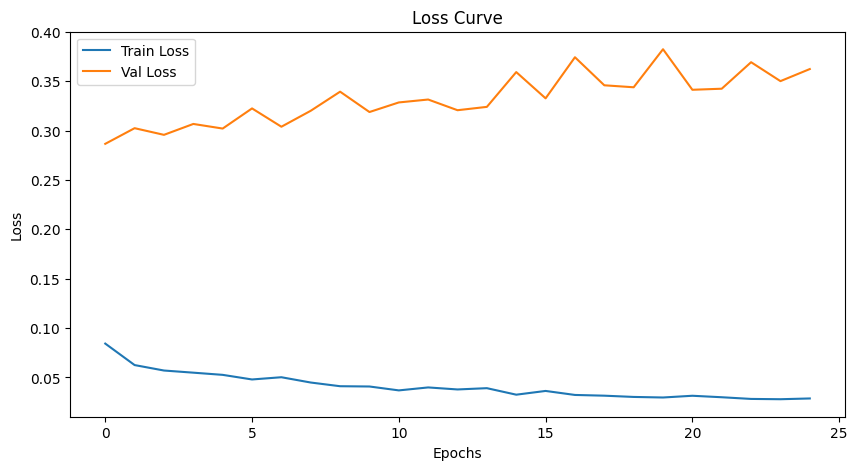

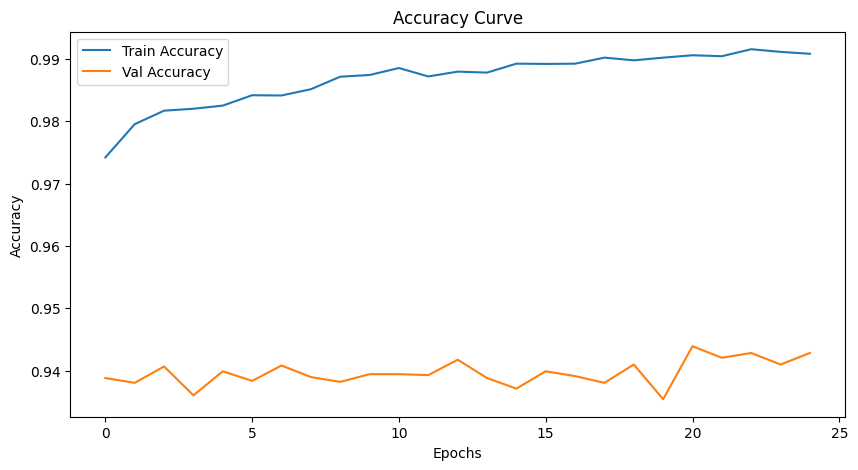

In [42]:
import matplotlib.pyplot as plt

# Loss Curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy Curve
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [43]:
model.save("final_project_model.h5")


In [44]:
model.save("my_model.keras")


In [47]:
import os

print(os.listdir())


['.config', 'ALL_DATA_13', 'Egypt_Data_Split', 'my_model.keras', 'SPLIT_DATA', 'Egypt_Data_Split (2).zip', 'final_project_model.h5', 'final_model.h5', 'sample_data']


In [48]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    if 'train' in dirs:
        print("Found train directory at:", os.path.join(root, 'train'))


Found train directory at: ./Egypt_Data_Split/Egypt_Data_Split/train
Found train directory at: ./SPLIT_DATA/train


In [49]:
train_path = "./SPLIT_DATA/train"

train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32
)


Found 25881 files belonging to 13 classes.


In [51]:
class_names = train_ds_raw.class_names
print(class_names)


['AnnualCrop', 'Crops', 'Desert', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'Urban']


In [52]:
import json

with open("labels.json", "w") as f:
    json.dump(class_names, f)


In [57]:
model.input_shape


(None, 128, 128, 3)

In [58]:
import tensorflow as tf
import numpy as np

# حمل الصورة بالحجم الصحيح
img = tf.keras.utils.load_img("desert_area3.jpg", target_size=(128, 128))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0) / 255.0

# توقع الموديل
pred = model.predict(img)

# اعلى احتمال
class_id = np.argmax(pred)

print("Predicted class:", class_names[class_id])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: HerbaceousVegetation


In [60]:
class_names = train_ds_raw.class_names
print(class_names)


['AnnualCrop', 'Crops', 'Desert', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'Urban']


In [67]:
import tensorflow as tf
import numpy as np

img_path = "desert_area3.jpg"

# 1. نفس حجم التدريب بالظبط
img = tf.keras.utils.load_img(img_path, target_size=(128, 128))

# 2. تحويل الصورة array
img = tf.keras.utils.img_to_array(img)

# 3. إضافة batch dimension
img = np.expand_dims(img, axis=0)

# 4. متعملش normalization لأن الموديل فيه Rescaling layer
pred = model.predict(img)

# 5. استخراج الكلاس
class_id = np.argmax(pred)
print("Predicted class:", class_names[class_id])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted class: Desert


In [68]:
import tensorflow as tf
import numpy as np

img = tf.keras.utils.load_img("desert_area33.jpg", target_size=(128, 128))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)   # بدون /255 !!! لأن الموديل بيعمل Rescaling بالفعل

pred = model.predict(img)
class_id = np.argmax(pred)
print("Predicted class:", class_names[class_id])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Desert


In [69]:
import tensorflow as tf
import numpy as np

# Load image
img = tf.keras.utils.load_img("desert_area33.jpg", target_size=(128, 128))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)   # متعملش /255 لأن فيه Rescaling في الموديل

# Predict
pred = model.predict(img)

# Get class index
class_id = np.argmax(pred)

confidence = pred[0][class_id] * 100

print("Predicted class:", class_names[class_id])
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Desert
Confidence: 100.00%


In [70]:
import tensorflow as tf
import numpy as np

# Load image
img = tf.keras.utils.load_img("/content/corp_area_316.jpg", target_size=(128, 128))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)   # متعملش /255 لأن فيه Rescaling في الموديل

# Predict
pred = model.predict(img)

# Get class index
class_id = np.argmax(pred)

confidence = pred[0][class_id] * 100

print("Predicted class:", class_names[class_id])
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Crops
Confidence: 97.72%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')